In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as st

import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

## Chapter 5 - Resampling Methods

**1** Using basic statistical properties of the variance, as well as single variable calculus, derive (5.6). In other words, prove that α given by (5.6) does indeed minimize $Var(\alpha X + (1-\alpha)Y)$.

>This ended up being more LaTex to type out than I want to commit to.

**2a** What is the probability that the first bootstrap observation is not the jth observation from the original sample ? Justify your answer.

> $1 - \frac{1}{n}$, just the probability **not** selecting one obseration.

**2b** What is the probability that the second bootstrap observation is not the jth observation from the original sample?

> It's the same $1 - \frac{1}{n}$, just the probability **not** selecting one obseration.

**2c** Bootstrap samples with replacement so each observation in the sample has the same chance of equalling the jth observation, multiplying the probabilities together we get $(1-\frac{1}{n})^n$

**2d** 67.2%

**2e** 63.4%

**2f** 63.2%

In [5]:
1-(1-1/5)**5

0.6723199999999999

In [6]:
1-(1-1/100)**100

0.6339676587267709

In [7]:
1-(1-1/1000)**1000

0.6323045752290363

In [8]:
x = np.arange(1, 100001)
y = 1 - (1 - 1/x) ** x

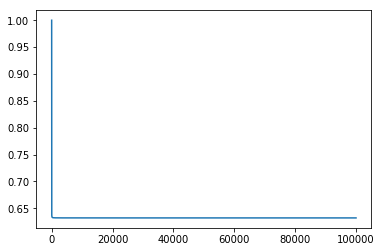

In [9]:
plt.plot(x, y);

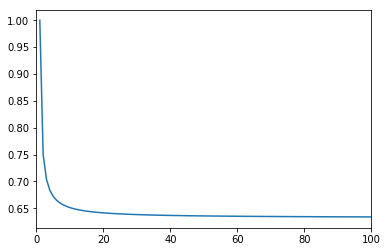

In [10]:
plt.plot(x, y)
plt.xlim(0,100);

**2g** There is an asymptote around 0.63.

**2h** We will now investigate numerically the probability that a bootstrap sample of size n=100 contains the jth observation. Here j=4. We repeatedly create bootstrap samples, and each time we record whether or not the fourth observation is contained in the bootstrap sample.

>This value is very close to what we would expect from the equation we derived earlier.

In [11]:
store = np.random.randint(1, 101, (100, 10000))
np.any(store == 4, axis=0).mean()

0.6385

**3a** Explain how k-fold cross-validation is implemented.
 
 > We split the dataset into k non-overlapping groups. We then train K models where each use the k group as a validation set, while training on the other $k-1$ sets. We take the mean of these errors to estimate our models true MSE. 
 
 **3b** What are the advantages and disadvantages of k-fold crossvalidation relative to:

**3bi** The validation set approach?
> The estimate of the test error rate can contain a lot of variance and only a subset of the observations are used to train. Most models perform better when trainined with more observations.

**3bii** LOOCV?

> LOOCV is computationaly expensive and can lead to unbiased estimates of the test error

**4** Suppose that we use some statistical learning method to make a prediction for the response Y for a particular value of the predictor X. Carefully describe how we might estimate the standard deviation of our prediction.

> We can use bootstrap to obtain repated random samples from the original data. We could do this a large amount of times, fiting a model each time and calculating RMSE for each model.

### Applied

**5** In Chapter 4, we used logisitc regression to predict the probability of default using income and balance on the Default data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.

**5a** Fit a logistic regression model that uses income and balance to predict default.

In [12]:
default = pd.read_csv('data/default.csv')
default['student'] = np.where(default['student'] == 'Yes', 1, 0)
default['default'] = np.where(default['default'] == 'Yes', 1, 0)

In [13]:
results = smf.logit(formula='default ~ balance + income', data=default).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Fri, 04 May 2018   Pseudo R-squ.:                  0.4594
Time:                        13:21:52   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000       -12.393   -10.688
balance        0.0056      0.000     24.835      0.000         0.005     0.006
income      2.081e-05   4.99e-06      4.174      0.000       1.1e-05  3.06e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**5b** Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:

**i** Split the sample set into a training set and a validation set.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(default[['balance', 'income']], default['default'])
X_train_smf = X_train.join(y_train) #for the smf model, might move to SciKit late

**ii** Fit a multiple logistic regression model using only the training observations.

In [15]:
results = smf.logit(formula='default ~ balance + income', data=X_train_smf).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.080439
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 7500
Model:                          Logit   Df Residuals:                     7497
Method:                           MLE   Df Model:                            2
Date:                Fri, 04 May 2018   Pseudo R-squ.:                  0.4546
Time:                        13:21:53   Log-Likelihood:                -603.29
converged:                       True   LL-Null:                       -1106.2
                                        LLR p-value:                4.005e-219
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -11.2487      0.485    -23.181      0.000       -12.200   -10.298
balance        0.0055      0.000     21.751      0.000         0.005     0.006
income      1.823e-05   5.68e-06      3.212      0.001      7.11e-06  2.94e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**iii** Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the  default category if the posterior probability is greater than 0.5.

In [16]:
pred = np.where(results.predict(X_test) > .5, 1, 0)

**iv** Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.

In [17]:
np.abs(y_test - pred).sum() / len(y_test)

0.0264

**5c** Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.

In [18]:
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(default[['balance', 'income']], default['default'])
    X_train_smf = X_train.join(y_train)
    results = smf.logit(formula='default ~ balance + income', data=X_train_smf).fit()
    pred = np.where(results.predict(X_test) > .5, 1, 0)
    print('Validation Set Error: ', np.abs(y_test - pred).sum() / len(y_test))

Optimization terminated successfully.
         Current function value: 0.077259
         Iterations 10
Validation Set Error:  0.0264
Optimization terminated successfully.
         Current function value: 0.077419
         Iterations 10
Validation Set Error:  0.0288
Optimization terminated successfully.
         Current function value: 0.076175
         Iterations 10
Validation Set Error:  0.0288


The validation set error can be vary, depending on which observations we include, but in this case not by a lot.

**5d** Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. 

Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.

In [19]:
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(default[['balance', 'income', 'student']], 
                                                    default['default'])
    X_train_smf = X_train.join(y_train)
    results = smf.logit(formula='default ~ balance + income + student', data=X_train_smf).fit()
    pred = np.where(results.predict(X_test) > .5, 1, 0)
    print('Validation Set Error: ', np.abs(y_test - pred).sum() / len(y_test))

Optimization terminated successfully.
         Current function value: 0.075799
         Iterations 10
Validation Set Error:  0.0296
Optimization terminated successfully.
         Current function value: 0.079860
         Iterations 10
Validation Set Error:  0.026
Optimization terminated successfully.
         Current function value: 0.078326
         Iterations 10
Validation Set Error:  0.0272


While the validation set error is pretty similar, it does have much more variance when student is included in the model.

**6** We continue to consider the use of a logistic regression model to predict the probability of default using income and balance on the Default data set. In particular, we will now computes estimates for the standard errors of the income and balance logistic regression coefficients in two different ways:

+ (1) using the bootstrap
+ (2) using the standard formula for computing the standard errors in the glm() function. Do not forget to set a random seed before beginning your analysis.

**6a** Using the summary() and glm() functions, determine the estimated standard errors for the coefficients associated with “income” and “balance” in a multiple logistic regression model that uses both predictors.

In [20]:
results = smf.logit(formula='default ~ balance + income', data=default).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Fri, 04 May 2018   Pseudo R-squ.:                  0.4594
Time:                        13:21:54   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000       -12.393   -10.688
balance        0.0056      0.000     24.835      0.000         0.005     0.006
income      2.081e-05   4.99e-06      4.174      0.000       1.1e-05  3.06e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

The model summary from statsmodels indicates that the standard error for $\beta_0$, $\beta_1$, and $\beta_2$ are $0.435$, $0.000$, and $4.99e^{-06}$

**6b** Write a function, boot.fn(), that takes as input the Default data set as well as an index of the observations, and that outputs the coefficient estimates for “income” and “balance” in the multiple logistic regression model.

In [21]:
def boot(data, obs):
    X_train = data.iloc[obs]
    results = smf.logit(formula='default ~ balance + income', data=X_train).fit(disp=0)
    #thanks to stackoverflow for the disp=0 trick, when I ran bootstrap below
    #the output was dreadful
    return results.params

In [22]:
obs = np.random.choice(default.index, 100)

In [23]:
boot(default, obs)

Intercept   -14.162901
balance       0.006099
income        0.000082
dtype: float64

**6c** Use the boot() function together with your boot.fn() function to estimate the standard errors of the logistic regression coefficients for income and balance. 

*Not exactly sure what the boot function does, but I can work it out.*

In [24]:
def bootstrap(data, num_samples, runs):
    beta_df = pd.DataFrame(columns=['Intercept', 'balance', 'income'])
    for i in range(runs):
        obs = np.random.choice(default.index, num_samples)
        coefs = boot(data, obs)
        beta_df = beta_df.append(coefs, ignore_index=True)
    
    return beta_df.std()

In [25]:
bootstrap(default, 1000, 100)

Intercept    1.588325
balance      0.000807
income       0.000016
dtype: float64

**6d** Comment on the estimated standard errors obtained using the glm() function and using your bootstrap function.

> The estimated standard errors are similar with the ones coming from the bootstrap method a little higher..

Standard errors are a wee bit higher in bootstrap

**7** In sections 5.3.2 and 5.3.3, we saw that the cv.glm() function can be used in order to compute the LOOCV test error estimate. Alternatively, one could compute those quantities using just the glm() and predict.glm() functions, and a for loop. You will now take this approach in order to compute the LOOCV error for a simple logistic regression model on the Weekly data set. Recall that in the context of classification problems, the LOOCV error is given in (5.4).

**7a** Fit a logistic regression model that predicts “Direction” using “Lag1” and “Lag2”.

In [26]:
weekly = pd.read_csv('data/weekly.csv')

In [27]:
weekly['Direction'] = np.where(weekly['Direction'] == 'Up', 1, 0)

In [28]:
results = smf.logit(formula='Direction ~ Lag1 + Lag2', data=weekly).fit(disp=0)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1086
Method:                           MLE   Df Model:                            2
Date:                Fri, 04 May 2018   Pseudo R-squ.:                0.005335
Time:                        13:22:00   Log-Likelihood:                -744.11
converged:                       True   LL-Null:                       -748.10
                                        LLR p-value:                   0.01848
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2212      0.061      3.599      0.000         0.101     0.342
Lag1          -0.0387      0.026     -1.477      0.140        -0.090     0.013
Lag2           0.0602      0.027      2.270      0.023         0.008     0.112
==============================================================================
"""

**7b** Fit a logistic regression model that predicts Direction using Lag1 and Lag2 using all but the first observation.

In [29]:
train = weekly.iloc[1:]
test = weekly.iloc[0]

In [30]:
results = smf.logit(formula='Direction ~ Lag1 + Lag2', data=train).fit(disp=0)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1088
Model:                          Logit   Df Residuals:                     1085
Method:                           MLE   Df Model:                            2
Date:                Fri, 04 May 2018   Pseudo R-squ.:                0.005387
Time:                        13:22:01   Log-Likelihood:                -743.26
converged:                       True   LL-Null:                       -747.29
                                        LLR p-value:                   0.01785
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2232      0.061      3.630      0.000         0.103     0.344
Lag1          -0.0384      0.026     -1.466      0.143        -0.090     0.013
Lag2           0.0608      0.027      2.291      0.022         0.009     0.113
==============================================================================
"""

**7c** Use the model from (b) to predict the direction of the first observation. You can do this by predicting that the first observation will go up if $P(direction = Up|Lag1,Lag2)>0.5$. Was this observation correctly classified?

> It was not classified correctly.

In [31]:
test.Direction

0.0

In [32]:
pred = np.where(results.predict(test) > .5, 1.0, 0.0)

In [33]:
pred[0]

1.0

**7d** Write a loop from $i=1$ to $i=n$, where $n$ is the number of observations in the data set, that performs each of the following steps:

+ Fit a logistic regression model using all but the ith observation to predict Direction using Lag1 and Lag2.

+ Compute the posterior probability of the market moving up for the ith observation.

+ Use the posterior probability for the ith observation in order to predict whether or not the market moves up.

+ Determine whether or not an error was made in predicting the direction for the ith observation. If an error was made, then indicate this as a 1, and otherwise indicate it as a 0.

In [34]:
errors = []
for i in range(weekly.shape[0]):
    loo = [j for j in weekly.index if j != i]
    train = weekly.iloc[loo]
    test = weekly.iloc[i]
    results = smf.logit(formula='Direction ~ Lag1 + Lag2', data=train).fit(disp=0)
    pred = np.where(results.predict(test) > .5, 1.0, 0.0)
    if pred == test.Direction:
        errors.append(0)
    else:
        errors.append(1)

In [35]:
np.mean(errors)

0.44995408631772266

**8** We will now perform cross-validation on a simulated data set.

**8a** Generate a simulated data set as follows:

In [93]:
np.random.seed(42)
x = np.random.normal(size=100)
y = x - 2*x**2 + np.random.normal(size=100)

In this data set, what is $n$ and what is $p$? Write out the model used to generate the data in equation form.

>$n=100$, $p=2$

**8b** Create a scatterplot of $X$ against $Y$. Comment on what you find.

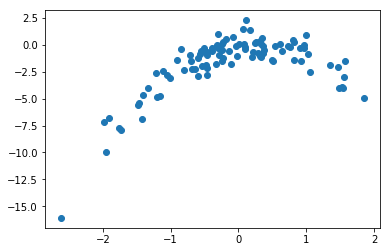

In [94]:
plt.scatter(x, y);

We can clearly see the quadratic relationship present in the data.

Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:
    
Note you may find it helpful to use the data.frame() function to create a single dataset containing both X and Y .

In [85]:
df = pd.DataFrame(np.array([x, x ** 2, x ** 3, x ** 4, y]).T, columns=['x', 'x2', 'x3', 'x4', 'y'])
df.shape

(100, 5)

In [98]:
errors = {}
for i in range(4):
    model_errors = []
    form = 'y ~ '
    for j in range(0,i+1):
        if j == 0:
            form += train.columns[j]
        else:
            form += ' + ' + train.columns[j]
    for ite in range(train.shape[0]):
        loo = [j for j in df.index if j != i]
        train = df.iloc[loo]
        test = df.iloc[ite]

        results = smf.ols(formula=form, data=train).fit()
        model_errors.append((test.y - results.predict(test)))

    
    errors[df.columns[i]] = np.mean(model_errors)

Below are the MSE for each model, it looks like the cubic model performed best.

In [99]:
errors

{'x': 0.033298208034557596,
 'x2': 0.016775059294228015,
 'x3': -0.008152255197720493,
 'x4': -0.01902393816782145}

**8d** Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c) ? Why ?

In [100]:
np.random.seed(23) #MJ
x = np.random.normal(size=100)
y = x - 2*x**2 + np.random.normal(size=100)

df = pd.DataFrame(np.array([x, x ** 2, x ** 3, x ** 4, y]).T, columns=['x', 'x2', 'x3', 'x4', 'y'])

errors = {}
for i in range(4):
    model_errors = []
    form = 'y ~ '
    for j in range(0,i+1):
        if j == 0:
            form += train.columns[j]
        else:
            form += ' + ' + train.columns[j]
    for ite in range(train.shape[0]):
        loo = [j for j in df.index if j != i]
        train = df.iloc[loo]
        test = df.iloc[ite]

        results = smf.ols(formula=form, data=train).fit()
        model_errors.append((test.y - results.predict(test)))

    
    errors[df.columns[i]] = np.mean(model_errors)

errors

{'x': 0.033298208034557596,
 'x2': 0.016775059294228015,
 'x3': -0.008152255197720493,
 'x4': -0.01902393816782145}

I am getting the same results as the last time, because LOOCV evaluates $n$ folds of a single observation.

**8e** Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

> I expected the quadratic to recieive the lowest prediction error to come from the quadratic fit, but it was actually the cubic that produced the error rate closest to 0.

In [102]:
for i in range(4):
    model_errors = []
    form = 'y ~ '
    for j in range(0,i+1):
        if j == 0:
            form += train.columns[j]
        else:
            form += ' + ' + train.columns[j]
    results = smf.ols(formula=form, data=train).fit()
    print(form)
    print('')
    print(results.summary())

y ~ x

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.3927
Date:                Fri, 04 May 2018   Prob (F-statistic):              0.532
Time:                        13:55:26   Log-Likelihood:                -245.79
No. Observations:                  99   AIC:                             495.6
Df Residuals:                      97   BIC:                             500.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.7965      0.296     -6.072  

**8f** Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

The linear and quadratic term gain significance in each model, and all four polynomial models perform very similarly.

**9** We will now consider the Boston housing data set.

**9a** Based on this data set, provide an estimate for the population mean of medv. Call this estimate $\hat{\mu}$.

> 22.532

In [103]:
boston = pd.read_csv('data/boston.csv')

In [104]:
boston['medv'].mean()

22.532806324110698

**9b** Provide an estimate of the standard error of $\hat{\mu}$.

In [106]:
boston['medv'].std() / np.sqrt(boston.shape[0])

0.4088611474975351

**9c** Now estimate the standard error of $\hat{\mu}$ using the bootstrap. How does this compare to your answer from (b)?

> This is extremely close to the value we got in part b.

In [108]:
sample_means = [boston['medv'].sample(n=len(boston), replace=True).mean() for i in range(10000)]
np.std(sample_means)

0.40886002940119864

**9d** Based on your bootstrap estimate from (c), provide a 95% confidence interval for the mean of medv. Compare it to the results obtained using `st.t.interval()`.

> Again, the two values are very close.

In [111]:
boot_se = np.std(sample_means)
np.mean(sample_means) - 2 * boot_se, np.mean(sample_means) + 2 * boot_se

(21.72089832064425, 23.356338438249043)

In [114]:
st.t.interval(0.95, boston.shape[0]-1, loc=boston['medv'].mean(), scale=st.sem(boston['medv']))

(21.729528014578616, 23.33608463364278)

**9e** Based on this data set, provide an estimate, $\hat{\mu_{\text{med}}}$, for the median value of medv in the population.

> 21.2

In [115]:
boston['medv'].median()

21.2

We now would like to estimate the standard error of $\hat{\mu_{\text{med}}}$. Unfortunately, there is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.

> We get an estimated median almost equal to the value obtained in (e), with a standard error of 0.38777.

In [118]:
sample_medians = [boston['medv'].sample(n = boston.shape[0], replace=True).median() for i in range(10000)]
print(np.mean(sample_medians), np.std(sample_medians))

21.182660000000002 0.3777874063544201


**9g** Based on this data set, provide an estimate for the tenth percentile of medv in Boston suburbs. Call this quantity $\hat{\mu_{0.1}}$.

In [119]:
boston['medv'].quantile(.1)

12.75

**9h** Use the bootstrap to estimate the standard error of $\hat{\mu_{0.1}}$. Comment on your findings.

> Our estiamted 10th quantile value is 12.75105, which is essntially equal to the sample value, with a standard error of 0.5081.

In [120]:
sample_quant_10 = [boston['medv'].sample(n = boston.shape[0], replace=True).quantile(.1) for i in range(10000)]
print(np.mean(sample_quant_10), np.std(sample_quant_10))

12.75105 0.50814062768096
